<a href="https://colab.research.google.com/github/lawrance-ye/QM2/blob/main/g12qm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture
!pip install Basemap
!pip install ipyleaflet

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)
#import library

In [10]:
!mkdir data
!mkdir data/g12
!curl https://www.openintro.org/data/csv/london_boroughs.csv -o ./data/g12/regions.csv
#download regions file

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/g12’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1202k  100 1202k    0     0  4180k      0 --:--:-- --:--:-- --:--:-- 4177k


In [11]:
regions_table=pd.read_csv('data/g12/regions.csv')
rtable=regions_table.groupby('borough')['x','y'].mean()
rtable.head()
#regions lati & longi

<ipython-input-11-de784b6c5731>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rtable=regions_table.groupby('borough')['x','y'].mean()


,x,y
borough,,
Barking & Dagenham,548155.647085,185371.747749
Barnet,524138.601329,190939.701444
Bexley,549321.454902,174897.902637
Brent,520807.536622,185814.522720
Bromley,543193.805244,165157.506806


In [27]:
income_table = pd.read_csv('sample_data/region_income.csv')

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")
#math library

isummary=income_table['2019'].describe().round(2) #present data
isummary=isummary.T
print(isummary)

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
#import regression function

#model = ols('______ ~  ______', data=______).fit()
#print(model.summary())

count    32.00
mean     16.70
std       2.19
min      12.88
25%      15.34
50%      16.16
75%      18.59
max      21.13
Name: 2019, dtype: float64


as number of crime is affected by income level, we can apply the relationship to estimate the probability of a crime event to occur in a time interval (one day)

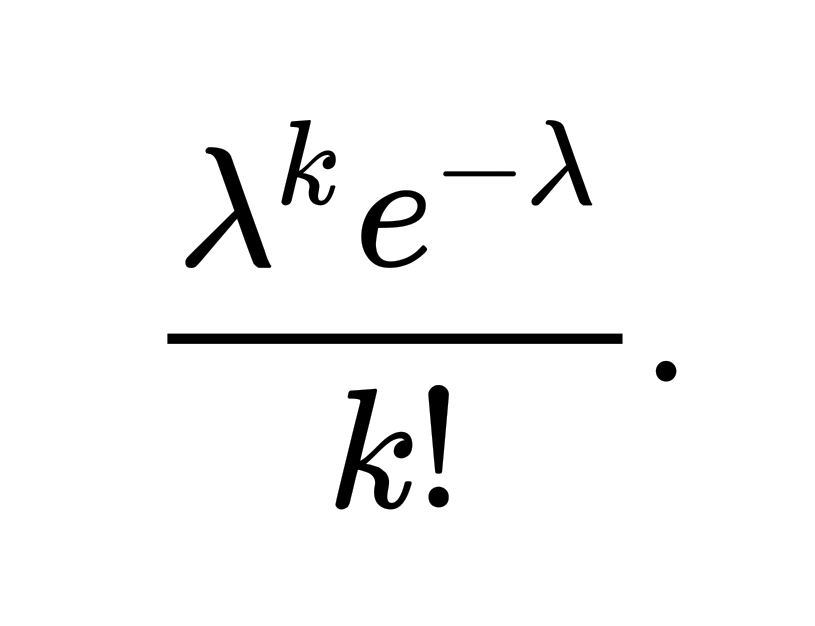

In [40]:
table = pd.read_csv('sample_data/finaldf.csv')
table
income_list=table['wage']

In [46]:
borough_list = []
for n in income_list:
  yearly_crime = 7.31 * n
  λ = yearly_crime / 365 # number of occurance in a time intervel
  k = 1 # we want to find the probability for having a crime activity in one day
  proba = (λ * 2.7183 ** (-1 * λ))  #apply variables to the poisson distribution formula
  borough_list.append(proba)
table['probability'] = borough_list #this shows the probability of having one crime in a day in each borough
table
clean = table.drop(columns=['population','crimes per 1000 people','rdup crimes per 1000 people','log crime rate','log income'])
clean

,Borough,total crimes,wage,probability
0,Barking and Dagenham,"25,200",12.88,0.199302
1,Barnet,36762,16.00,0.232584
2,Bexley,21357,15.84,0.230997
3,Brent,36211,14.21,0.214103
4,Bromley,29965,18.41,0.255006
5,Camden,44826,19.17,0.261522
6,Croydon,41668,15.51,0.227684
7,Ealing,38609,14.57,0.217950
8,Enfield,36393,13.67,0.208206
9,Greenwich,34456,15.85,0.231096


the result shows the probability of having one crime in each borough.
the result might be invalid due to the following reasons:

 the estimated average number of events can be affected by more socialeconomic variables such as inequality, education level etc, which means the probability of having crime activity might not be constant in the model.

 the occurance of one crime event might affect the probability of having a second crime event (serial crime)

 alternative statistical methods, considering the complex nature of crime patterns, are more appropriate for estimating crime probabilities